### Выбрать значение шага дискретизации в пределах от 5 до 15. Продискретизировать с этим шагом дискретизации изображение и вывести его на экран.

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
image=cv2.imread('pic/Cat.jpg')

In [38]:
img = image.copy()
K = 20 #качество скукоживания
s = img.shape
h1, w1 = s[0], s[1] #высота и ширина
h = (s[0] - s[0]%K)
w = (s[1] - s[1]%K)
img = cv2.resize(img,(w,h))

In [39]:
for y in range(0, h-1, K):
    for x in range(0, w-1, K):
        if len(s)>2:
            s = np.average(img[y:(y+K), x:(x+K)], axis=0)
            img[y:(y+K), x:(x+K)] = np.average(s, axis=0)
        else:
            s = img[y:(y+K), x:(x+K)]
            img[y:(y+K), x:(x+K)] = np.average(s)

In [40]:
img = cv2.resize(img,(w1,h1))
res = np.hstack((image,img))

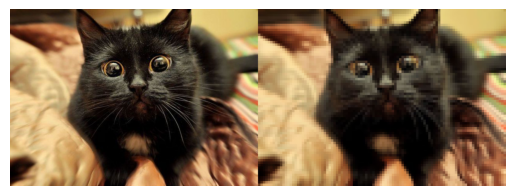

In [41]:
plt.imshow(res[...,::-1])
plt.axis("off");

### Проквантовать изображение, сократив число градаций до 4

In [42]:
img = cv2.imread('pic/Cat.jpg')

Z = img.reshape((-1, 3))

Z = np.float32(Z)

crt=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [58]:
K = 4

In [59]:
ret,label,center=cv2.kmeans(Z,K,None,crt,10,cv2.KMEANS_RANDOM_CENTERS)

In [60]:
center = np.uint8(center)

In [61]:
res = center[label.flatten()]
res2 = res.reshape((img.shape))

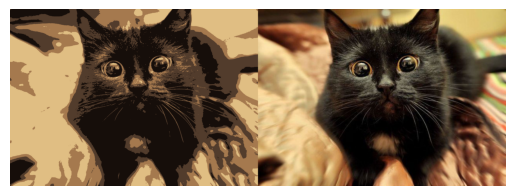

In [62]:
full_res = np.hstack((res2, img))
plt.imshow(full_res[...,::-1])
plt.axis('off');